In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
# pandas is liased as pd
import numpy as np
# nupmy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('/content/drive/My Drive/USArrests.csv')
df.head()  # top 5 rows

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [26]:
df.shape

(50, 4)

In [23]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [30]:
# Selecting the columns for the KMeans clustering
X = df.iloc[:,1:]
X.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [16]:
from sklearn.cluster import KMeans

In [17]:
# Elbow method
wcss=[]
for i in range(1,15):    # i=numbers of clusters=[1,2,3,4,........9]
    model=KMeans(n_clusters=i)
    model.fit(X)
    wcss.append(model.inertia_)

# model.inertia_ = model attribute that returns the sum of squared distance between a data point and its closest
# cluster centroid. It returns the sum for the all the data points.
print('WCSS\n',wcss)
print(model.inertia_)

WCSS
 [355807.8216, 96399.02814449917, 47964.26535714285, 34728.629357142854, 24417.02352380952, 18882.023919191925, 15886.913269841272, 13259.145611111111, 11151.505119047619, 10382.833809523807, 9005.73430952381, 8138.596976190476, 7373.54630952381, 6457.533166666666]
6457.533166666666


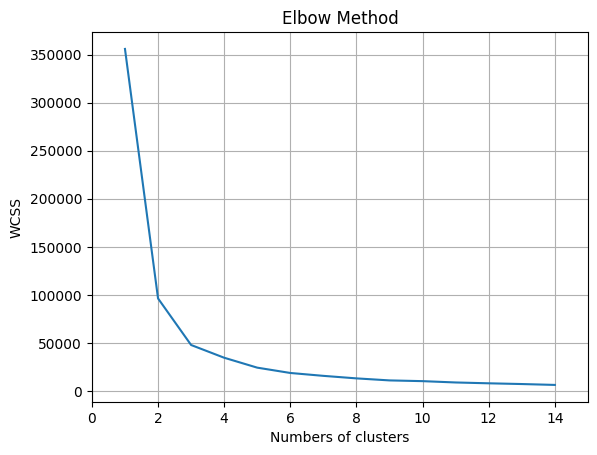

In [18]:
plt.plot(list(range(1,15)),wcss)
plt.xlabel('Numbers of clusters')
plt.ylabel('WCSS')
plt.xlim([0,15])
plt.title('Elbow Method')
plt.grid()
plt.show()

In [31]:
# Create a KMeans instance with clusters: Best k model
model = KMeans(n_clusters=3,random_state=2021)

In [32]:
# Fit model to points
model.fit(X)

KMeans(n_clusters=3, random_state=2021)

In [43]:
#y=X.iloc[:1,:]
#y

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2


In [41]:
# Determine the cluster labels of new_points: labels
#labels = model.predict(y)
#print(labels)

[0]


In [38]:
clusterID = pd.DataFrame({'ClustID':labels},index=Y.index)
print(clusterID)
clusteredData = pd.concat([Y,clusterID],axis='columns')
print(clusteredData)

                ClustID
States                 
Alabama               0
Alaska                0
Arizona               0
Arkansas              2
California            0
Colorado              2
Connecticut           1
Delaware              0
Florida               0
Georgia               2
Hawaii                1
Idaho                 1
Illinois              0
Indiana               1
Iowa                  1
Kansas                1
Kentucky              1
Louisiana             0
Maine                 1
Maryland              0
Massachusetts         2
Michigan              0
Minnesota             1
Mississippi           0
Missouri              2
Montana               1
Nebraska              1
Nevada                0
New Hampshire         1
New Jersey            2
New Mexico            0
New York              0
North Carolina        0
North Dakota          1
Ohio                  1
Oklahoma              2
Oregon                2
Pennsylvania          1
Rhode Island          2
South Carolina  

In [36]:
Y=pd.read_csv('/content/drive/My Drive/USArrests.csv',index_col=0)
Y.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
